In [50]:

#  importing all the libraries required for the experiment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import TweetTokenizer
import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('max_colwidth',400)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:

#  reading the dataset file from the content folder
train = pd.read_csv('/content/train.tsv.txt', delimiter='\t', usecols = ['SentenceId','Phrase','Sentiment'])
pd.set_option('display.max_colwidth', -1)
# displaying top 10 records of the dataset with all the headers
train.head(10)


,SentenceId,Phrase,Sentiment
0,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,1,A series,2
3,1,A,2
4,1,series,2
5,1,of escapades demonstrating the adage that what is good for the goose,2
6,1,of,2
7,1,escapades demonstrating the adage that what is good for the goose,2
8,1,escapades,2
9,1,demonstrating the adage that what is good for the goose,2


In [52]:
# printing the sentiment counts for each sentiment in the dataset
train['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4    9206 
0    7072 
Name: Sentiment, dtype: int64

In [53]:
# importing libraries for the pre processing of the data
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import SnowballStemmer,WordNetLemmatizer,PorterStemmer,LancasterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')
stemmer=LancasterStemmer()
lemma=WordNetLemmatizer()
stopwords_en = stopwords.words("english")
punctuations="?:!.,;'\"-()"
remove_stopwords = False
useStemming = True
useLemma = True
removePuncs = True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#  creating a clean review column which is done after removeing stop words and lower case all the words.
#  wordnet lemmatizer is used to lemmatize the words.
def final_review(review_col):
    review_corpus=[]
    for i in range(0,len(review_col)):
      review=str(review_col[i])
      review=re.sub('[^a-zA-Z]',' ',review)
        
      if useStemming:
        review = stemmer.stem(review)
      if useLemma:
         review=[lemma.lemmatize(w) for w in word_tokenize(str(review).lower())]
      review=' '.join(review)
      review_corpus.append(review)
    return review_corpus

       
        # review=re.sub('[^a-zA-Z]',' ',review)
        # review = stemmer.stem(review)
       
        
       
    

   

In [55]:
 
# displaying the result of the clean review after the preprocessing
train['final_review']=final_review(train.Phrase.values)
train.head(5)

,SentenceId,Phrase,Sentiment,final_review
0,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,a series of escapade demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amount to much of a story
1,1,A series of escapades demonstrating the adage that what is good for the goose,2,a series of escapade demonstrating the adage that what is good for the goose
2,1,A series,2,a series
3,1,A,2,a
4,1,series,2,sery


In [0]:
tokenizer = TweetTokenizer()

In [57]:
# word tokenizing the data from the clean phrases obtained after the preprocessing
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(train['final_review'].values) 
vectorizer.fit(full_text)
upsampled_vectorized_data = vectorizer.transform(train['final_review'])


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [0]:
#  storing the sentiment value in the Y column
y = train['Sentiment']

In [59]:
#  since the data is a multi class , we turn the sentiment into categorical form for easy processing and classfication
from keras.utils import to_categorical
X = train['final_review']

Y = to_categorical(train['Sentiment'].values)
print(Y)

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [0]:
#  splitting the train file into train and test with ration of 70 and 30
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [61]:
#  printing the shape of the X and Y column of the train set
print(type(X_train))
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


<class 'pandas.core.series.Series'>
(109242,) (109242, 5)
(46818,) (46818, 5)


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [63]:
#  word tokenizing the train set and generating the frequency distribution
all_words=' '.join(X_train)
all_words=word_tokenize(all_words)
#print(all_words)
fre_dist=FreqDist(all_words)

total_unique_word=len(fre_dist)
total_unique_word
#X_train.head()

17715

In [64]:
#  max length for the embbeder is set after tokenizing
r_len=[]
for text in X_train:
    word=word_tokenize(text)
  #  print(text)
    l=len(word)
    r_len.append(l)
    
MAX_word_len=np.max(r_len)
MAX_word_len

48

In [0]:
#  setting the maximum features obtained from tokenizing and TFIDF and setting teh epocha and batch size for the model input
max_features = total_unique_word
max_words = MAX_word_len
batch_size = 128
epochs = 10
num_classes=5

In [0]:

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [0]:
#  tokenizing text to sequences for the test and train set
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)
X_train = tokenizer.texts_to_sequences(X_train)
# X_val = tokenizer.texts_to_sequences(X_val)

X_test = tokenizer.texts_to_sequences(X_test)
#X_test

In [68]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
# X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#print(X_train.shape,X_val.shape)
X_test

array([[    0,     0,     0, ...,     0,     0, 14660],
       [    0,     0,     0, ...,     8,     1,  2759],
       [    0,     0,     0, ...,   516,     1,  1198],
       ...,
       [    0,     0,     0, ...,     3,   362,  5535],
       [    0,     0,     0, ...,     1,   795,   152],
       [    0,     0,     0, ...,     0,   189,   908]], dtype=int32)

In [0]:
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential

In [0]:
#  building the model with all teh layers used for efficent classfication
cnn_model = Sequential()

# Input / Embdedding
cnn_model.add(Embedding(max_features, 150, input_length=max_words))

# CNN
cnn_model.add(SpatialDropout1D(0.2))

cnn_model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

# Output layer
cnn_model.add(Dense(5, activation='softmax'))

Train on 109242 samples, validate on 46818 samples
Epoch 1/10
109242/109242 [==============================] - 7s 64us/step - loss: 1.0127 - acc: 0.5951 - val_loss: 0.8771 - val_acc: 0.6470
Epoch 2/10
109242/109242 [==============================] - 6s 59us/step - loss: 0.7863 - acc: 0.6773 - val_loss: 0.8419 - val_acc: 0.6588
Epoch 3/10
109242/109242 [==============================] - 6s 59us/step - loss: 0.6947 - acc: 0.7133 - val_loss: 0.8464 - val_acc: 0.6593
Epoch 4/10
109242/109242 [==============================] - 6s 59us/step - loss: 0.6258 - acc: 0.7399 - val_loss: 0.8743 - val_acc: 0.6575
Epoch 5/10
109242/109242 [==============================] - 6s 58us/step - loss: 0.5728 - acc: 0.7596 - val_loss: 0.9170 - val_acc: 0.6510
Epoch 6/10
109242/109242 [==============================] - 7s 61us/step - loss: 0.5319 - acc: 0.7772 - val_loss: 0.9529 - val_acc: 0.6485
Epoch 7/10
109242/109242 [==============================] - 7s 60us/step - loss: 0.4944 - acc: 0.7934 - val_loss: 1

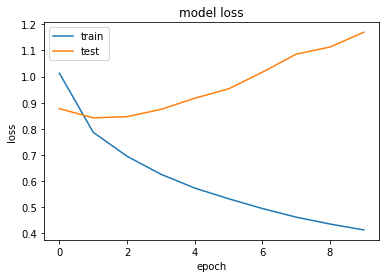

In [71]:
#  passing the training set to the model with loss and accuracy metrics
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn_model.fit(X_train, Y_train,validation_data= (X_test, Y_test) ,epochs=epochs, batch_size=batch_size, verbose=1)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# saving the state of the model for future use
cnn_model.save("cnn_model.h5")

In [0]:
from keras.models import load_model
model = load_model('cnn_model.h5')

In [75]:
# testing the model and displaying the precision, recall and f1 score of the model
from sklearn.metrics import classification_report
predection=cnn_model.predict_classes(X_test,verbose=1)
Y_test=np.argmax(Y_test, axis=1)
print(classification_report(Y_test, predection, digits=5))

46818/46818 [==============================] - 2s 45us/step
              precision    recall  f1-score   support

           0    0.49406   0.31517   0.38484      2110
           1    0.52043   0.53273   0.52651      8081
           2    0.73085   0.76580   0.74792     23920
           3    0.54218   0.54044   0.54131      9929
           4    0.52211   0.42081   0.46602      2778

    accuracy                        0.63700     46818
   macro avg    0.56193   0.51499   0.53332     46818
weighted avg    0.63146   0.63700   0.63279     46818

